## Mini-Project: Nonlinear Magnetic Driven Pendulum

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import imageio
from matplotlib import style

In [2]:
#rk4 scheme, simplified from Garcia
def rk4(x,tau,derivs):
    """
    x = state input
    tau = time step
    derivs = derivs(state) which returns n-array of derivatives from initial n-state vector
    """
    
    half_tau = 0.5*tau
    k1 = derivs(x)  #If state is sub into x for rk4, this will read derivs(state)
    
    xtemp = x + half_tau*k1
    k2 = derivs(xtemp)  
    
    xtemp = x + half_tau*k2
    k3 = derivs(xtemp)
    
    xtemp = x + tau*k3
    k4 = derivs(xtemp)
    
    xout = x + tau/6.*(k1 + k4 + 2.*(k2+k3))
    return xout

#returns derivatives of driver phase and pendulum angle
#use to sub into rk4 scheme
def derivs(s):
    
    #z and theta saved from state vector at current step to sub into equations of motion
    theta = s[0] 
    phi = s[1]
    #Saves 1st derivs in state vector
    omega = s[2]
    dphi = s[3]
    
    #Formula parameters
    #h and r must come after theta to adjust new height for each step in time
    h = d + L*(1-np.cos(theta)) #height of pendulum bob from ground y=0
    r = np.sqrt((L*np.sin(theta))**2+h**2) #distance from magnet to pendulum bob
    
    #Equation of motion for angular acceleration
    ddtheta = -A*np.sin(theta) + B*np.sin(phi) - C*omega + (abs(theta)/theta) * (D/r**2) * \
    np.cos(abs(theta) + np.arctan(float(-abs(h/(L*np.sin(theta))))))
    
    #Returns temporary state vector to be iterated through rk4
    derivs = np.array([omega,dphi,ddtheta,ddphi])
    return derivs

Initial pendulum angle in rad: 10


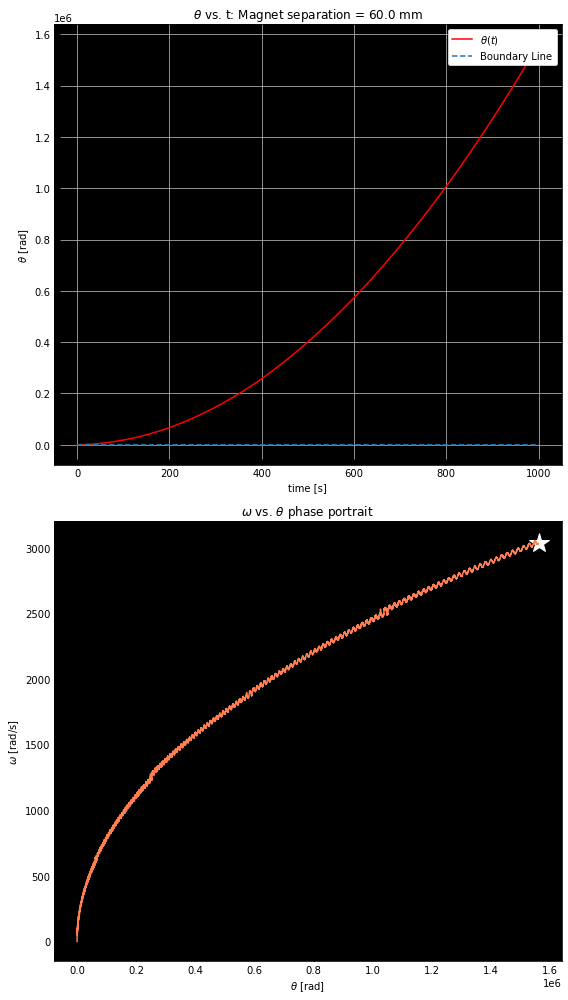

Initial pendulum angle in rad: 10


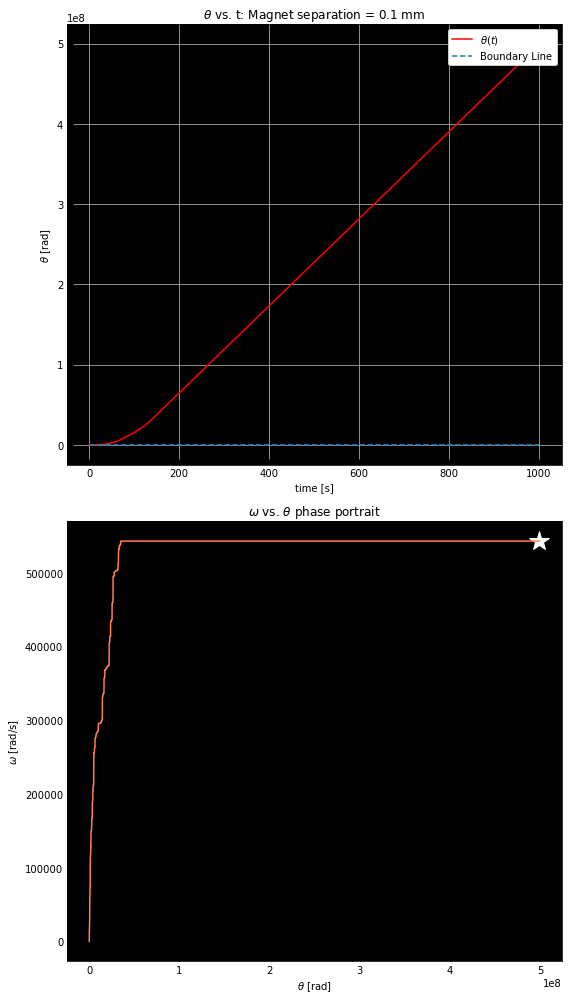

Gravitational force coefficient:  109.70149253731343
Damping force coefficient:  16.707507239919803
Driving force coefficient:  0.00010024504343951881
Magnetic force coefficient: 0.20099999999999996


In [3]:
dlist = [.06,.0001]#[.5,0.08,.06655,.05566,.05,.04,.0001] #meters

for d in dlist:

    #Enter initial conditions
    theta0 = eval(input('Initial pendulum angle in rad: ')) #Initial angle of pendulum
    phi0 = 0 #Initial driver phase (angle)
    omega = 0 #Initial angular velocity of pendulum
    dphi = 1 #driving frequency must kick-start with nonzero value
    ddphi = 0 #acceleration of driving frequency
    state = np.array([theta0, phi0, omega, dphi])  #state vector for theta,phi & 1st derivatives
    
    textvals = f'Magnet separation = {1000*d} mm' #text input for plot
    
    # Parameters
    g = 9.8 #m s-2 - Acceleration of gravity
    L = 0.134 #m - Length of Pendulum
    gamma = 6e-6 #N s/m - Damping Constant
    m1 = 670 #A m - Magnetic pole strength magnet 1
    m2 = 670 #A m - Magnetic pole strength magnet 2
    mu0 = 4*np.pi*1e-7 # H/m - Magnetic permeability of free space
    M = 5 #kg - Mass of pendulum
    T_driv = 1 # N m -Driving torque
    #d = .07 #m

    #Equation of motion constants
    A = 3/2 * g/L #Gravity force coefficient
    B = 3*T_driv/(2*M*L**2) # Driving force coefficient
    C = 3*gamma/(2*M*L**2) #Damping force coefficient
    D = 3*mu0*m1*m2/(4*np.pi*M*L) #Magnetic force coefficient

    #Set time counter, time step, and periods for z and theta
    time = 0.0  #Initial time
    tau = .01 #Time step
    T = 1000 #Total time
    N = int(T/tau) #Number of steps in loop

    #Create empty arrays for plotting omega, theta, time, phi, dphi
    omegaplot = np.empty(N)
    thplot = np.empty(N)
    tplot = np.empty(N)
    phiplot = np.empty(N)
    dphiplot = np.empty(N)

    #Loop through data
    for i in range(N):

        #Save each state vector index to be plotted
        thplot[i] = state[0]  
        phiplot[i] = state[1]
        omegaplot[i] = state[2]
        dphiplot[i] = state[3]
        tplot[i] = time
        #Subs state into rk4 to return new state after one time step (tau)
        state = rk4(state, tau, derivs)
        time += tau
    
    #Define a boundary line between positive and negative regions of theta
    line=[] 
    for j in range(N):
        y = 0*j
        line.append(y)
    
    plt.rcParams.update({"figure.figsize" : (12, 8),
                     "axes.facecolor" : "black",
                     "axes.edgecolor":  "black"})
    fig,ax = plt.subplots(nrows=2, ncols=1, figsize=(8, 14)) #Create two plots vertically
    
    #First plot theta vs. time
    ax[0].plot(tplot,thplot, '-r') #plots theta vs. time
    ax[0].plot(tplot,line, '--') #plots boundary line at theta=0
    #ax[0].plot(tplot,omegaplot,'.m') #plots omega vs. time
    ax[0].set_title(r'$\theta$ vs. t: ' + textvals)
    ax[0].grid(True)
    ax[0].legend([r'$\theta (t)$','Boundary Line'], loc = 'upper right',
              frameon=True, facecolor='white', framealpha=1)
    ax[0].set_xlabel('time [s]')
    ax[0].set_ylabel(r'$\theta$ [rad]')
    ax[0].tick_params('both', length=6, width = 1.2, which='major', direction='in')
   
    #Second plot - phase portrait of omega vs theta
    ax[1].plot(thplot[N-1],omegaplot[N-1],'*', markersize = 20, color ='white')
    ax[1].plot(thplot,omegaplot, color = '#FF7F50')
    ax[1].set_title(r'$\omega$ vs. $\theta$ phase portrait')
    ax[1].grid(False)
    ax[1].set_xlabel(r'$\theta$ [rad]')
    ax[1].set_ylabel(r'$\omega$ [rad/s]')
    ax[1].tick_params('both', length=6, width = 1.2, which='major', direction='in')
    
    plt.tight_layout()
    
    plt.show()
    
print('Gravitational force coefficient: ', A)
print('Damping force coefficient: ', B)
print('Driving force coefficient: ', C)
print('Magnetic force coefficient:', D)

In [4]:
#Animation for simple pendulum
png_files = []

for i in thplot[1:100]:
    x0=0
    y0=0
    x1=(1*np.sin(i))
    y1=-(1*np.cos(i))
    filename = f'Animations/test-{i}.png'
  
    png_files.append(filename)

    #Plotting

    plt.figure(figsize=(15,15))
    #Plotting the base line of the pendulum
    plt.plot([-0.5 ,0.5],[0,0],linewidth =5,color ='r')
    plt.plot([x0,x1],[y0,y1],linewidth=3,color = 'g')

    plt.plot(x1,y1,'o',markersize =20,color ='black')
    plt.xlim([-.4,.4])
    plt.ylim([-1.1,0])
    plt.title('Animation of Simple pendulum')
    plt.savefig(filename)
    plt.close()
with imageio.get_writer('2000.gif', mode='i') as writer:
    for filename in png_files:
        image = imageio.imread(filename)
        writer.append_data(image)

![SegmentLocal](2000.gif "segment")

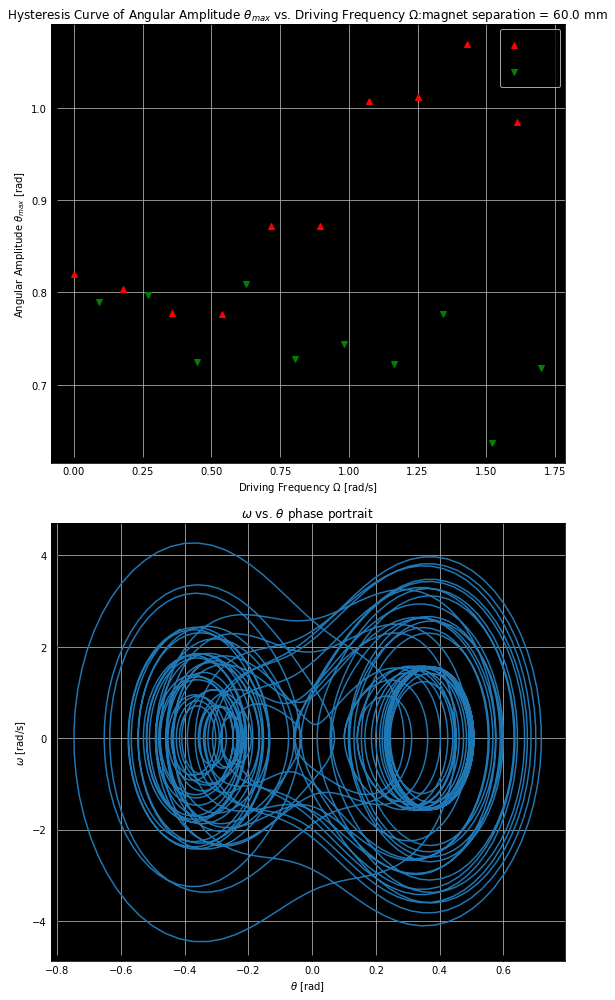

In [5]:
dphilist = np.linspace(0,1.7,20)
ddphilist = [1e-1,-1e-1]
amp1 = []
amp2 = []
for dphi in dphilist:
#Enter initial conditions
    theta0 = .1
    phi0 = 0
    omega = 0 #Initial angular velocity of pendulum
    for ddphi in ddphilist:
    
        state = np.array([theta0, phi0, omega, dphi])  #zeros in place of 1st derivs

        textvals = f'magnet separation = {1000*d} mm'
        # Parameters
        g = 9.8 #m s-2 - Acceleration of gravity
        L = 0.134 #m - Length of Pendulum
        gamma = 6e-6 #N s/m - Damping Constant
        m1 = 670 #A m - Magnetic pole strength magnet 1
        m2 = 670 #A m - Magnetic pole strength magnet 2
        mu0 = 4*np.pi*1e-7 # H/m - Magnetic permeability of free space
        M = 5 #kg - Mass of pendulum
        T_driv = 1 # N m -Driving torque
        d = .06 #m


        #Formula constants
        A = 3/2 * g/L #Gravity force coefficient
        B = 3*T_driv/(2*M*L**2) # Driving force coefficient
        C = 3*gamma/(2*M*L**2) #Damping force coefficient
        D = 3*mu0*m1*m2/(4*np.pi*M*L) #Magnetic force coefficient


        #Set time counter, time step, and periods for z and theta
        time = 0.0 
        tau = .01
        T = 50
        N = int(T/tau) #Steps for 2 periods

        #Create empty arrays for plotting z,theta,t
        omegaplot = np.empty(N)
        thplot = np.empty(N)
        tplot = np.empty(N)
        phiplot = np.empty(N)
        dphiplot = np.empty(N)

        #Loop through data
        for i in range(N):

            #Saves each iteration
            thplot[i] = state[0]  
            phiplot[i] = state[1]
            omegaplot[i] = state[2]
            dphiplot[i] = state[3]
            tplot[i] = time
            #Subs state into rk4 to return new state(z,theta,dz_dt,dtheta_dt)
            state = rk4(state, tau, derivs)
            time += tau

        if ddphi > 0:
            amp1.append(max(thplot))
        elif ddphi <  0:
            amp2.append(max(thplot))
    
fig,ax = plt.subplots(nrows=2, ncols=1, figsize=(8, 14))
ax[0].plot(dphilist[::2],amp1[::2], '^r')
ax[0].plot(dphilist[::-2],amp2[::-2], 'vg')
#ax.plot(tplot,omegaplot,'.m') #convert z to centimeters to scale with theta range
ax[0].set_title(r'Hysteresis Curve of Angular Amplitude $\theta_{max}$ vs. Driving Frequency $\Omega$:' + textvals)
ax[0].grid(True)
ax[0].legend([r'$+\frac{d^2\phi}{dt^2}$',r'$-\frac{d^2\phi}{dt^2}$'], loc = 'upper right',
              frameon=True)
ax[0].set_xlabel(r'Driving Frequency $\Omega$ [rad/s]')
ax[0].set_ylabel(r'Angular Amplitude $\theta_{max}$ [rad]')
ax[0].tick_params('both', length=6, width = 1.2, which='major', direction='in')

ax[1].plot(thplot,omegaplot)
ax[1].set_title(r'$\omega$ vs. $\theta$ phase portrait')
ax[1].grid(True)
ax[1].set_xlabel(r'$\theta$ [rad]')
ax[1].set_ylabel(r'$\omega$ [rad/s]')
ax[1].tick_params('both', length=6, width = 1.2, which='major', direction='in')

plt.tight_layout()

plt.show()